In [91]:
# 데이터처리
from __future__ import print_function
import numpy as np
import pandas as pd
from IPython.display import display, HTML
# 머신러닝 알고리즘 및 평가
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab
import scipy as sp
import sklearn.preprocessing as preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
############# 보스턴 주택가격 데이터 변수설명
#[01]  CRIM: 자치시(town) 별 1인당 범죄율  
#[02]  ZN: 25,000 평방피트를 초과하는 거주지역의 비율  
#[03]  INDUS: 비소매상업지역이 점유하고 있는 토지의 비율  
#[04]  CHAS: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
#[05]  NOX: 10ppm 당 농축 일산화질소  
#[06]  RM: 주택 1가구당 평균 방의 개수  
#[07]  AGE: 1940년 이전에 건축된 소유주택의 비율  
#[08]  DIS: 5개의 보스턴 직업센터까지의 접근성 지수
#[09]  RAD: 방사형 도로까지의 접근성 지수  
#[10]  TAX: 10,000 달러 당 재산세율  
#[11]  PTRATIO: 자치시(town)별 학생/교사 비율  
#[12]  B: 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.  
#[13]  LSTAT: 모집단의 하위계층의 비율(%)  [14]  MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [93]:
############ 데이터 불러오기
dat_dir = 'C:/kdev/pythonCode/day2/'
dat = pd.read_csv(dat_dir+'Regression_1_boston_housing.csv')
display(HTML(dat.to_html()))
dat = dat.drop('ID', axis = 1)
display(HTML(dat.to_html()))

In [94]:
####### 데이터 보기
#Data format 
print("number of observation in data : {} ".format(dat.shape[0]))
print("number of Variables in Data : {}".format(dat.shape[1]))
dat.head(10)

number of observation in data : 333 
number of Variables in Data : 14


crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
3  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
4  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311     15.2   
5  0.22489  12.5   7.87     0  0.524  6.377  94.3  6.3467    5  311     15.2   
6  0.11747  12.5   7.87     0  0.524  6.009  82.9  6.2267    5  311     15.2   
7  0.09378  12.5   7.87     0  0.524  5.889  39.0  5.4509    5  311     15.2   
8  0.62976   0.0   8.14     0  0.538  5.949  61.8  4.7075    4  307     21.0   
9  0.63796   0.0   8.14     0  0.538  6.096  84.5  4.4619    4  307     21.0   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  395.60  12.43  22.9  
5  392.52  20.45  15.0  
6  396.90  13.27  18.9  
7  390.50  15.71  21.7  
8  396.90   8.26  20.4  
9  380.02  10.26  18.2

    데이터 전처리 

In [95]:
# split x variable to y variable
x,y = dat.drop('medv',axis=1),dat['medv']


In [96]:
x

crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
3     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
4     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
5     0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
6     0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
7     0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311   
8     0.62976   0.0   8.14     0  0.538  5.949   61.8  4.7075    4  307   
9     0.63796   0.0   8.14     0  0.538  6.096   84.5  4.4619    4  307   
10    0.62739   0.0   8.14     0  0.538  5.834   56.5  4.4986    4  307   
11    1.05393   0.0   8.14     0  0.538  5.935   29.3  4.4986    4  307   
12    0.80271   0.0   8.14     0  0.538  5.456   36.6  3.7965    4  307   
13    1.25179   0.0   8.14     0  0.538  5.570   98.1  3.7979    4  307   
14    0.85204   0.0   8.14     0  0.538  5.965   89.2  4.0123    4  307   
15    1.23247   0.0   8.14     0  0.538  6.142   91.7  3.9769    4  307   
16    0.98843   0.0   8.14     0  0.538  5.813  100.0  4.0952    4  307   
17    0.95577   0.0   8.14     0  0.538  6.047   88.8  4.4534    4  307   
18    1.13081   0.0   8.14     0  0.538  5.713   94.1  4.2330    4  307   
19    1.35472   0.0   8.14     0  0.538  6.072  100.0  4.1750    4  307   
20    1.61282   0.0   8.14     0  0.538  6.096   96.9  3.7598    4  307   
21    0.17505   0.0   5.96     0  0.499  5.966   30.2  3.8473    5  279   
22    0.02763  75.0   2.95     0  0.428  6.595   21.8  5.4011    3  252   
23    0.03359  75.0   2.95     0  0.428  7.024   15.8  5.4011    3  252   
24    0.14150   0.0   6.91     0  0.448  6.169    6.6  5.7209    3  233   
25    0.15936   0.0   6.91     0  0.448  6.211    6.5  5.7209    3  233   
26    0.12269   0.0   6.91     0  0.448  6.069   40.0  5.7209    3  233   
27    0.17142   0.0   6.91     0  0.448  5.682   33.8  5.1004    3  233   
28    0.18836   0.0   6.91     0  0.448  5.786   33.3  5.1004    3  233   
29    0.22927   0.0   6.91     0  0.448  6.030   85.5  5.6894    3  233   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
303   7.83932   0.0  18.10     0  0.655  6.209   65.4  2.9634   24  666   
304   3.16360   0.0  18.10     0  0.655  5.759   48.2  3.0665   24  666   
305   3.77498   0.0  18.10     0  0.655  5.952   84.7  2.8715   24  666   
306   4.42228   0.0  18.10     0  0.584  6.003   94.5  2.5403   24  666   
307  15.57570   0.0  18.10     0  0.580  5.926   71.0  2.9084   24  666   
308  13.07510   0.0  18.10     0  0.580  5.713   56.7  2.8237   24  666   
309   4.03841   0.0  18.10     0  0.532  6.229   90.7  3.0993   24  666   
310   3.56868   0.0  18.10     0  0.580  6.437   75.0  2.8965   24  666   
311   8.05579   0.0  18.10     0  0.584  5.427   95.4  2.4298   24  666   
312   4.87141   0.0  18.10     0  0.614  6.484   93.6  2.3053   24  666   
313  15.02340   0.0  18.10     0  0.614  5.304   97.3  2.1007   24  666   
314  10.23300   0.0  18.10     0  0.614  6.185   96.7  2.1705   24  666   
315  14.33370   0.0  18.10     0  0.614  6.229   88.0  1.9512   24  666   
316   5.82401   0.0  18.10     0  0.532  6.242   64.7  3.4242   24  666   
317   5.70818   0.0  18.10     0  0.532  6.750   74.9  3.3317   24  666   
318   2.81838   0.0  18.10     0  0.532  5.762   40.3  4.0983   24  666   
319   2.37857   0.0  18.10     0  0.583  5.871   41.9  3.7240   24  666   
320   5.69175   0.0  18.10     0  0.583  6.114   79.8  3.5459   24  666   
321   4.83567   0.0  18.10     0  0.583  5.905   53.2  3.1523   24  666   
322   0.15086   0.0  27.74     0  0.609  5.454   92.7  1.8209    4  711   
323   0.20746   0.0  27.74     0  0.609  5.093   98.0  1.8226    4  711   
324   0.10574   0.0  27.74     0  

In [97]:
y.head(10)

0    24.0
1    21.6
2    33.4
3    36.2
4    22.9
5    15.0
6    18.9
7    21.7
8    20.4
9    18.2
Name: medv, dtype: float64

    정규화 (x에 값차이가 커서 한다) 무슨 차가 크지??? 질문 --> 어떤거는 백분율 차이가 있어 변경함

In [98]:
X=preprocessing.maxabs_scale(x)

In [99]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [100]:
X=pd.DataFrame(X)
X.columns = x.columns

In [101]:
X.head(10)

crim     zn     indus  chas       nox        rm    age       dis  \
0  0.000086  0.180  0.083273   0.0  0.617681  0.753582  0.652  0.381875   
1  0.000371  0.000  0.254867   0.0  0.538462  0.735931  0.789  0.463769   
2  0.000440  0.000  0.078587   0.0  0.525832  0.802063  0.458  0.566016   
3  0.000939  0.000  0.078587   0.0  0.525832  0.819140  0.542  0.566016   
4  0.001201  0.125  0.283706   0.0  0.601607  0.689054  0.666  0.519173   
5  0.003058  0.125  0.283706   0.0  0.601607  0.730888  0.943  0.592579   
6  0.001597  0.125  0.283706   0.0  0.601607  0.688711  0.829  0.581375   
7  0.001275  0.125  0.283706   0.0  0.601607  0.674957  0.390  0.508940   
8  0.008564  0.000  0.293439   0.0  0.617681  0.681834  0.618  0.439530   
9  0.008676  0.000  0.293439   0.0  0.617681  0.698682  0.845  0.416599   

        rad       tax   ptratio     black     lstat  
0  0.041667  0.416315  0.721698  1.000000  0.131156  
1  0.083333  0.340366  0.839623  1.000000  0.240716  
2  0.125000  0.312236  0.882075  0.994281  0.077430  
3  0.125000  0.312236  0.882075  1.000000  0.140374  
4  0.208333  0.437412  0.716981  0.996725  0.327364  
5  0.208333  0.437412  0.716981  0.988964  0.538583  
6  0.208333  0.437412  0.716981  1.000000  0.349486  
7  0.208333  0.437412  0.716981  0.983875  0.413748  
8  0.166667  0.431786  0.990566  1.000000  0.217540  
9  0.166667  0.431786  0.990566  0.957470  0.270213

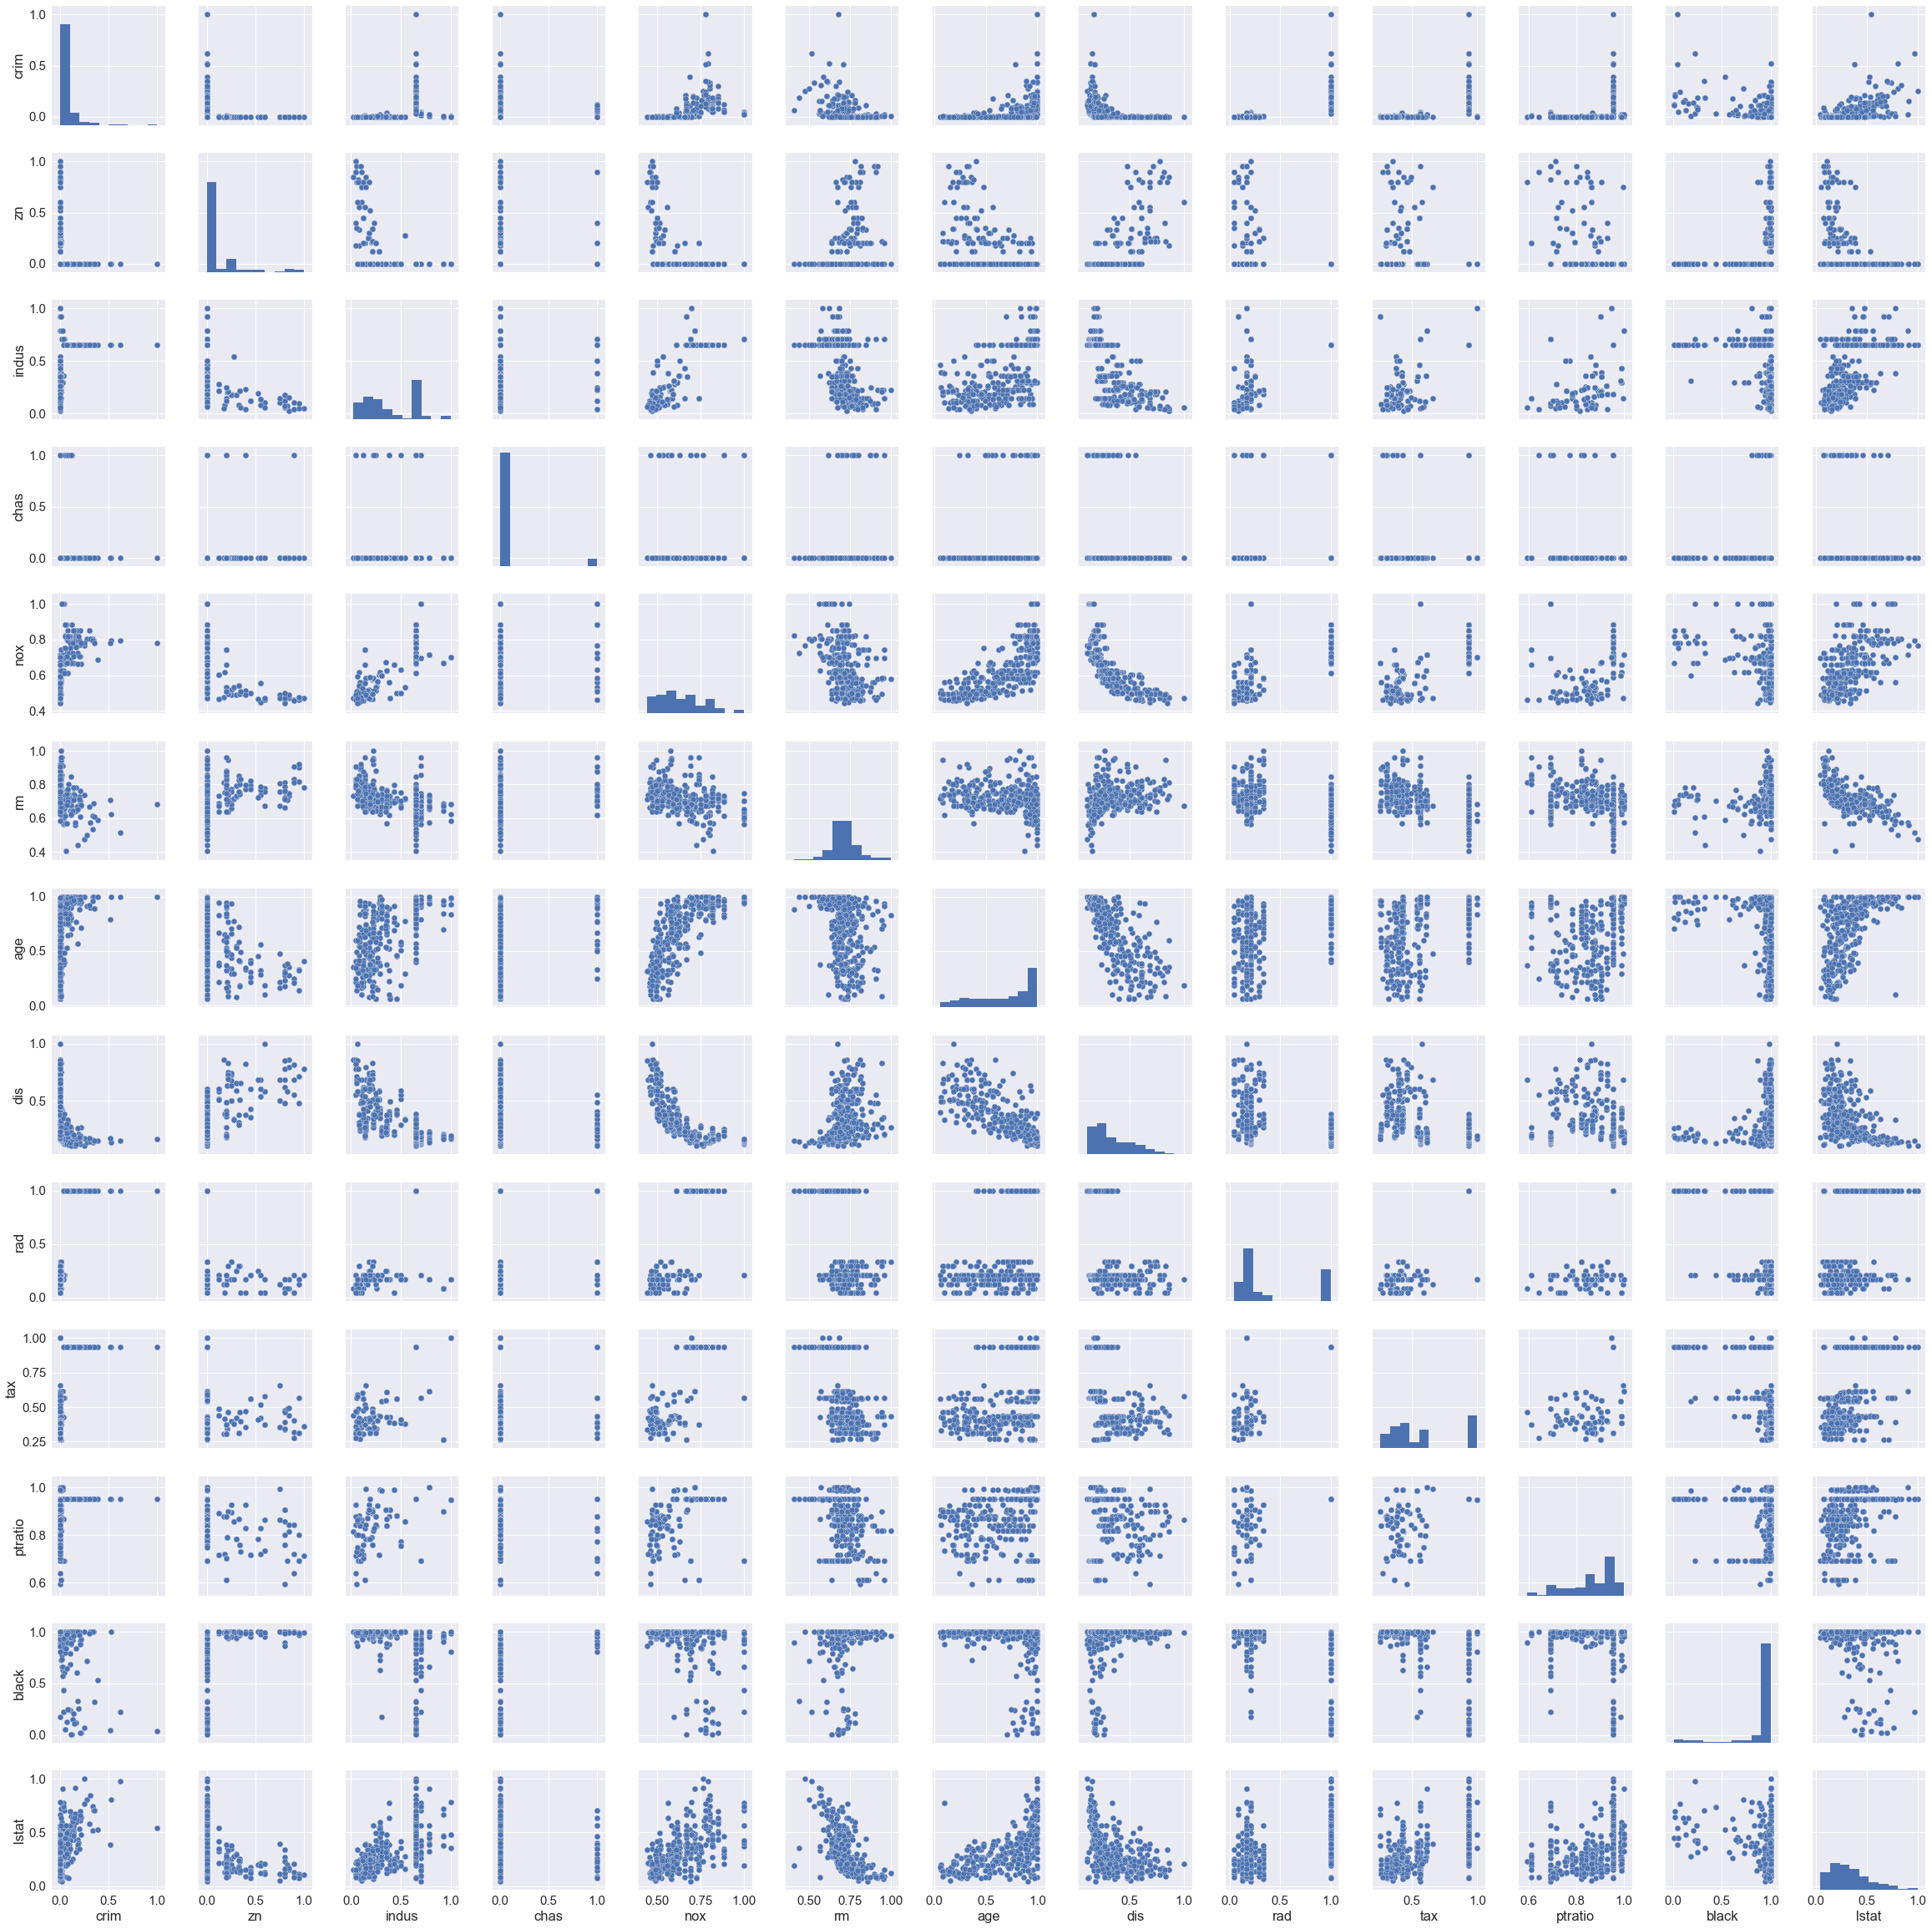

In [102]:
# scatter plot
#sns.set(style='whitegrid', context='notebook')
sns.pairplot(X)
plt.show()

In [31]:
#correlation analysis
colnames = list(X.columns.values)
X_cm=np.corrcoef(X[colnames].values.T)

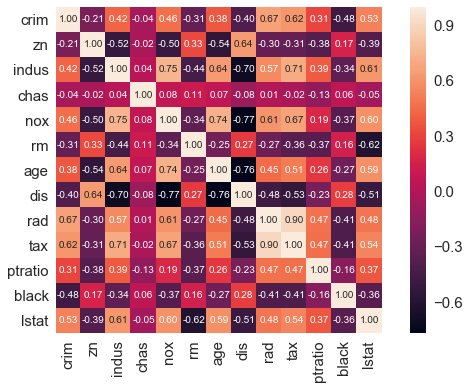

In [32]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,6))
X_hm = sns.heatmap(X_cm, cbar=True, annot=True, square=True, fmt='.2f',
                         annot_kws={'size':10},yticklabels=colnames,xticklabels=colnames)
plt.show()

In [36]:
X_train,X_test ,y_train,y_test = train_test_split(X,y, test_size=0.3)


In [37]:
lm = sm.OLS(y_train,X_train)

In [38]:
lm_trained=lm.fit()

In [40]:
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     378.0
Date:                Tue, 11 Sep 2018   Prob (F-statistic):          1.79e-142
Time:                        11:07:21   Log-Likelihood:                -704.72
No. Observations:                 233   AIC:                             1435.
Df Residuals:                     220   BIC:                             1480.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -1.8777      4.572     -0.411      0.682     -10.888       7.133
zn             4.4370      2.241      1.980      0.049       0.020       8.853
indus          1.4106      2.708      0.521      0.603      -3.927       6.748
chas           2.9896      1.383      2.161      0.032       0.263       5.716
nox           -1.0809      4.564     -0.237      0.813     -10.076       7.914
rm            47.6621      4.220     11.295      0.000      39.346      55.979
age           -1.1787      2.169     -0.543      0.587      -5.453       3.096
dis           -9.5738      3.425     -2.795      0.006     -16.325      -2.823
rad            5.9140      2.349      2.518      0.013       1.285      10.543
tax           -7.5596      4.010     -1.885      0.061     -15.463       0.343
ptratio       -6.1724      3.665     -1.684      0.094     -13.395       1.051
black          6.6849      1.742      3.839      0.000       3.253      10.117
lstat        -20.4489      2.851     -7.172      0.000     -26.068     -14.830
==============================================================================
Omnibus:                      109.298   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.724
Skew:                           1.814   Prob(JB):                    5.83e-126
Kurtosis:                       9.800   Cond. No.                         34.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

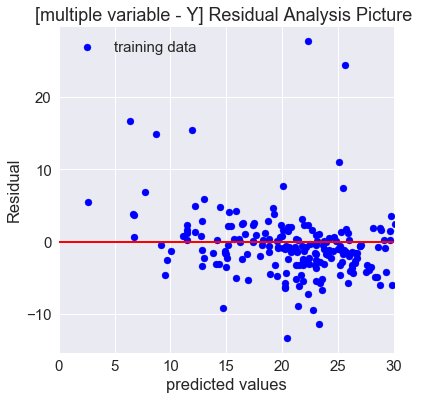

In [48]:
plt.figure(figsize=(6,6))
plt.scatter(lm_trained.fittedvalues, lm_trained.resid, c='blue',marker='o',label='training data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.hlines(y=0,xmin=0,xmax=30,lw=2,color='red')
plt.xlim([-0,30])
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()

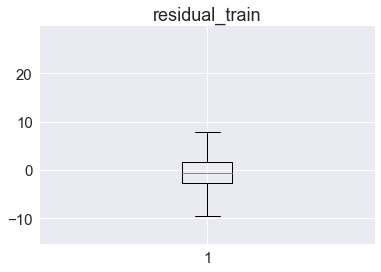

In [54]:
plt.figure()
plt.boxplot(lm_trained.resid)
plt.title('residual_train')
plt.show()

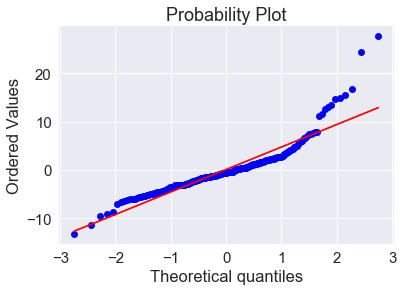

In [56]:
stats.probplot(lm_trained.resid, dist='norm', plot=pylab)
pylab.show()
#붉은선에 매칭되어야 부합됨...잘 붙으면 좋은 데이터 ?


    학습모델로 예측 하는 내용 

In [57]:
y_pred_train = lm_trained.predict(X_train)
y_pred_train

115    24.139798
204    35.110731
145    22.710155
224    21.889638
271    10.075145
127    25.125566
47     25.281796
250    22.769756
94     14.966527
291    20.271836
142    42.122032
325    17.534376
63     25.376677
10     20.621696
177    32.526267
53     21.995087
30     15.230078
205    28.759091
331    29.868887
12     15.884377
256    14.984849
207    15.721006
43     28.351718
150    21.277548
65     25.221825
324    14.913992
217    19.901560
76     23.603299
144    23.339211
19     18.900443
         ...    
112    21.790040
162    23.061694
86     12.841556
194    33.549566
287    21.539642
78     22.088282
41     24.860481
13     12.219923
240    11.978977
223    23.039529
99      7.691200
121    29.106356
159    39.729713
275    15.851770
233    18.287266
172    26.258762
15     16.841599
45     20.529096
24     24.677971
114    19.164158
302    25.944586
263    20.454250
66     22.123707
16     14.182554
245    25.620300
55     26.568129
158    22.003509
254     6.7574

In [58]:
y_pred_test = lm_trained.predict(X_test)
y_pred_test

157    30.223229
280    17.848735
169    22.141334
278    18.004658
189    43.416010
321    22.209787
141    40.654282
253     2.308194
61     29.928997
75     26.048537
111    21.972650
195    31.602874
138    29.639894
102    22.074779
285    20.695979
100     9.140226
241    15.137472
49     23.792087
309    23.023735
304    19.151407
199    26.982745
198    16.866765
168    20.778581
154    41.354569
246    26.926105
133    29.742085
272    16.020925
28     18.560862
69     17.871431
215    25.968278
         ...    
82     22.032970
77     22.112543
320    20.838300
312    21.855090
267    10.699465
0      28.388684
119    26.307310
32     22.310675
260    21.473491
176    40.997913
90     17.421096
103    17.010131
11     22.353286
109    36.327839
79     17.956451
137    29.480400
237    22.752333
193    25.636974
91     13.775992
216    26.243660
5      17.447444
122    23.152882
22     30.956338
153    39.223250
126    34.599372
160    38.530902
294    27.114879
218    19.2473

In [ ]:
# performance mbeasure: MSE, MAE, MAPE, Rsquared

In [66]:

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mse_train: %.2f, mse_test: %.2f"
      %(mse_train,mse_test))

mse_train: 24.81, mse_test: 24.44


In [65]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("mae_train: %.2f, mae_test: %.2f"
      %(mae_train,mae_test))

mae_train: 3.30, mae_test: 3.48


In [67]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [68]:
# MAPE: Mean of absolute percent error
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("mape_train: %.2f, mape_test: %.2f"
      %(mape_train,mape_test))

mape_train: 17.55, mape_test: 16.82


In [69]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("r2_train: %.2f, r2_test: %.2f"
      %(r2_train,r2_test))

r2_train: 0.68, r2_test: 0.75


In [71]:
################## Multiple Linear Regression with Logarithm
y_train_log = pd.DataFrame(np.log(y_train))
#y_test_log = pd.DataFrame(np.log(y_test))
y_train_log

medv
115  3.104587
204  3.508556
145  3.194583
224  2.944439
271  2.174752
127  3.589059
47   3.186353
250  2.587764
94   2.587764
291  2.646175
142  3.912023
325  3.000720
63   3.117950
10   2.990720
177  3.433987
53   3.034953
30   2.965273
205  3.126761
331  3.173878
12   3.005683
256  2.442347
207  2.778819
43   3.157000
150  3.077312
65   3.025291
324  2.610070
217  3.100092
76   2.917771
144  3.194583
19   2.674149
..        ...
112  3.218876
162  3.178054
86   2.753661
194  3.349904
287  2.734368
78   2.954910
41   3.218876
13   2.610070
240  3.314186
223  3.025291
99   2.681022
121  3.380995
159  3.730501
275  2.388763
233  2.923162
172  3.210844
15   2.721295
45   3.091042
24   3.230804
114  3.169686
302  3.005683
263  1.974081
66   3.063391
16   2.674149
245  3.912023
55   3.173878
158  3.190476
254  2.351375
179  3.126761
297  2.701361

[233 rows x 1 columns]

In [75]:
lm_log=sm.OLS(y_train_log,X_train)
lm_log_trained = lm_log.fit()
lm_log_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2316.
Date:                Tue, 11 Sep 2018   Prob (F-statistic):          3.09e-227
Time:                        11:24:06   Log-Likelihood:                -17.167
No. Observations:                 233   AIC:                             60.33
Df Residuals:                     220   BIC:                             105.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.5577      0.239     -2.332      0.021      -1.029      -0.086
zn             0.1704      0.117      1.454      0.147      -0.061       0.401
indus          0.0097      0.142      0.069      0.945      -0.269       0.289
chas           0.1113      0.072      1.538      0.125      -0.031       0.254
nox            1.0041      0.239      4.207      0.000       0.534       1.474
rm             2.7197      0.221     12.325      0.000       2.285       3.155
age           -0.1577      0.113     -1.391      0.166      -0.381       0.066
dis            0.0186      0.179      0.104      0.917      -0.334       0.372
rad            0.0644      0.123      0.524      0.601      -0.178       0.306
tax           -0.2635      0.210     -1.256      0.210      -0.677       0.150
ptratio        0.6169      0.192      3.218      0.001       0.239       0.995
black          0.4346      0.091      4.772      0.000       0.255       0.614
lstat         -0.8263      0.149     -5.542      0.000      -1.120      -0.533
==============================================================================
Omnibus:                       49.759   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.275
Skew:                           0.760   Prob(JB):                     2.96e-47
Kurtosis:                       7.445   Cond. No.                         34.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
lm_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     378.0
Date:                Tue, 11 Sep 2018   Prob (F-statistic):          1.79e-142
Time:                        11:23:44   Log-Likelihood:                -704.72
No. Observations:                 233   AIC:                             1435.
Df Residuals:                     220   BIC:                             1480.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -1.8777      4.572     -0.411      0.682     -10.888       7.133
zn             4.4370      2.241      1.980      0.049       0.020       8.853
indus          1.4106      2.708      0.521      0.603      -3.927       6.748
chas           2.9896      1.383      2.161      0.032       0.263       5.716
nox           -1.0809      4.564     -0.237      0.813     -10.076       7.914
rm            47.6621      4.220     11.295      0.000      39.346      55.979
age           -1.1787      2.169     -0.543      0.587      -5.453       3.096
dis           -9.5738      3.425     -2.795      0.006     -16.325      -2.823
rad            5.9140      2.349      2.518      0.013       1.285      10.543
tax           -7.5596      4.010     -1.885      0.061     -15.463       0.343
ptratio       -6.1724      3.665     -1.684      0.094     -13.395       1.051
black          6.6849      1.742      3.839      0.000       3.253      10.117
lstat        -20.4489      2.851     -7.172      0.000     -26.068     -14.830
==============================================================================
Omnibus:                      109.298   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.724
Skew:                           1.814   Prob(JB):                    5.83e-126
Kurtosis:                       9.800   Cond. No.                         34.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
y_pred_train_log=lm_log_trained.predict(X_train)
y_pred_train_log_exp=np.exp(y_pred_train_log) #로그랑 다시 비교하기 위해서???


y_pred_test_log = lm_log_trained.predict(X_test)
y_pred_test_log_exp = np.exp(y_pred_test_log)


In [80]:
mean_squared_error(y_test,y_pred_test_log_exp)

24.02531124015744

In [81]:
def backwardElimination(x, y):
    SL = 0.05
    elimed_Variable = []
    numVars = len(np.array(x)[0])
    for i in range(0, numVars):
        regressor_OLS = smf.OLS(y, np.array(x)).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(np.array(x), j, 1)
                                        
        else:
            elimed_Variable.append(i)
            pass
    regressor_OLS.summary()
    return elimed_Variable

In [82]:
imp_variabble = backwardElimination(X_train, y_train)
imp_variabble

[5, 6, 7, 8, 9, 10, 11, 12]

In [83]:
X_train.iloc[:,imp_variabble]

rm    age       dis       rad       tax   ptratio     black  \
115  0.733754  0.952  0.211245  0.208333  0.566807  0.693396  0.831544   
204  0.850430  0.719  0.289366  0.291667  0.312236  0.867925  1.000000   
145  0.695014  0.591  0.395806  0.166667  0.389592  0.877358  0.960746   
224  0.685960  0.454  0.449306  0.208333  0.315049  0.952830  1.000000   
271  0.682751  1.000  0.168305  1.000000  0.936709  0.952830  0.041446   
127  0.704183  0.622  0.242561  0.125000  0.271449  0.839623  1.000000   
47   0.735473  0.066  0.493665  0.166667  0.428973  0.905660  0.966818   
250  0.778682  0.988  0.126794  1.000000  0.936709  0.952830  1.000000   
94   0.671289  0.982  0.155794  0.166667  0.614627  1.000000  0.987755   
291  0.708883  0.987  0.211161  1.000000  0.936709  0.952830  1.000000   
142  0.920802  0.319  0.477858  0.166667  0.315049  0.693396  0.984001   
325  0.685731  0.835  0.196997  0.166667  1.000000  0.948113  1.000000   
63   0.735473  0.661  0.288722  0.083333  0.379747  0.839623  0.988108   
10   0.668653  0.565  0.420026  0.166667  0.431786  0.990566  0.996775   
177  0.839771  0.945  0.194094  0.208333  0.371308  0.613208  0.991232   
53   0.703725  0.458  0.381922  0.208333  0.559775  0.882075  0.974956   
30   0.642063  0.620  0.568397  0.125000  0.327707  0.844340  1.000000   
205  0.760458  0.825  0.309749  0.166667  0.427567  0.867925  1.000000   
331  0.799542  0.910  0.202375  0.041667  0.383966  0.990566  1.000000   
12   0.625330  0.366  0.354472  0.166667  0.431786  0.990566  0.728118   
256  0.617765  0.989  0.161349  1.000000  0.936709  0.952830  1.000000   
207  0.569971  0.378  0.235232  0.166667  0.427567  0.867925  0.882968   
43   0.720917  0.178  0.617303  0.166667  0.473980  0.759434  1.000000   
150  0.706476  0.913  0.284586  0.333333  0.431786  0.820755  0.995818   
65   0.716218  0.773  0.337526  0.166667  0.379747  0.858491  1.000000   
324  0.685731  0.988  0.174421  0.166667  1.000000  0.948113  0.982892   
217  0.697192  0.437  0.505672  0.208333  0.403657  0.924528  1.000000   
76   0.716791  0.842  0.210685  0.250000  0.607595  0.839623  0.979441   
144  0.725043  0.525  0.406609  0.166667  0.389592  0.877358  0.994885   
19   0.695931  1.000  0.389812  0.166667  0.431786  0.990566  0.949181   
..        ...    ...       ...       ...       ...       ...       ...   
112  0.699255  0.930  0.213197  0.208333  0.566807  0.693396  0.605089   
162  0.697536  0.615  0.340971  0.333333  0.431786  0.820755  0.949232   
86   0.643324  0.956  0.164066  0.083333  0.264416  0.900943  0.905241   
194  0.786361  0.279  0.477736  0.166667  0.344585  0.905660  1.000000   
287  0.743266  1.000  0.184719  1.000000  0.936709  0.952830  0.974376   
78   0.690086  0.826  0.256519  0.250000  0.607595  0.839623  0.993978   
41   0.775014  0.434  0.745161  0.333333  0.399437  0.929245  0.996674   
13   0.638395  0.981  0.354603  0.166667  0.431786  0.990566  0.948778   
240  0.408138  0.879  0.150621  1.000000  0.936709  0.952830  0.893676   
223  0.694441  0.373  0.449306  0.208333  0.315049  0.952830  0.998085   
99   0.564585  0.957  0.136392  0.208333  0.566807  0.693396  0.986924   
121  0.750258  0.331  0.292457  0.208333  0.416315  0.783019  0.985034   
159  0.955530  0.733  0.358384  0.333333  0.431786  0.820755  0.972310   
275  0.710831  0.787  0.173935  1.000000  0.936709  0.952830  0.047417   
233  0.674384  0.185  1.000000  0.166667  0.578059  0.863208  0.988486   
172  0.737880  0.089  0.690616  0.291667  0.464135  0.900943  0.950038   
15   0.703954  0.917  0.371315  0.166667  0.431786  0.990566  1.000000   
45   0.673696  0.214  0.606706  0.166667  0.485232  0.891509  0.998262   
24   0.707049  0.066  0.534149  0.125000  0.327707  0.844340  0.965911   
114  0.673582  0.792  0.226502  0.208333  0.566807  0.693396  0.573469   
302  0.746476  0.899  0.261580  1.000000  0.936709  0.952830  0.992240   
263  0.726991  1.000  0.146971  1.000000  0.936709  0.952830  1.000000   
66   0.706361  

In [90]:
lm_selected=sm.OLS(y_train_log,X_train)

X_train.iloc[:,imp_variabble].columns

Index(['rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'], dtype='object')

In [87]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [89]:
imp_variable_stepwise = stepwise_selection(X_train, y_train)
imp_variable_stepwise

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  lstat                          with p-value 2.6261e-41
Add  rm                             with p-value 5.50378e-10
Add  ptratio                        with p-value 1.42755e-05
Add  dis                            with p-value 0.000573768
Add  nox                            with p-value 0.00306019
Add  chas                           with p-value 0.00629929
Add  rad                            with p-value 0.00477515
Add  black                          with p-value 0.00352844


['lstat', 'rm', 'ptratio', 'dis', 'nox', 'chas', 'rad', 'black']